# Linear Regression with One Variable

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file ex1data1.txt (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [387]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


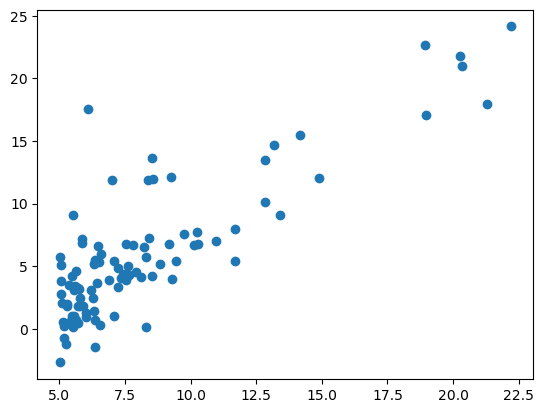

In [388]:
plt.scatter(X, y)
#plt.xlabel("Population of the City in 10,000")
#plt.ylabel("Profit in $10,000s")
plt.show()

# Adding the intercept term

In [389]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

C:\Users\klikh\AppData\Local\Temp\ipykernel_13404\351318876.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
C:\Users\klikh\AppData\Local\Temp\ipykernel_13404\351318876.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [390]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Computing the cost

In [391]:
#computing cost
def computeCost(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)


In [392]:
J=computeCost(X,y,theta)
print(J)

32.072733877455676


# Finding the optimal parameters using Gradient Descent

In [393]:
#compoute gradient descetn
def gradientDescentUnivariate(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=np.dot(X.transpose(),(y_pred-y))
        descent=alpha*1/m *error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history
theta,J_history=gradientDescentUnivariate(X,y,theta,alpha,iterations)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"X1")

h(x) = -3.63 + 1.17X1


In [394]:
#checking the cost values with new theta values
J=computeCost(X,y,theta)
print(J)

4.483388256587725


In [395]:
#we already have a vector of all the cost values throught the history
print(J_history[-1])

4.483388256587725


# 3D diagram for a univariate linear regression
the cost function is a convex function

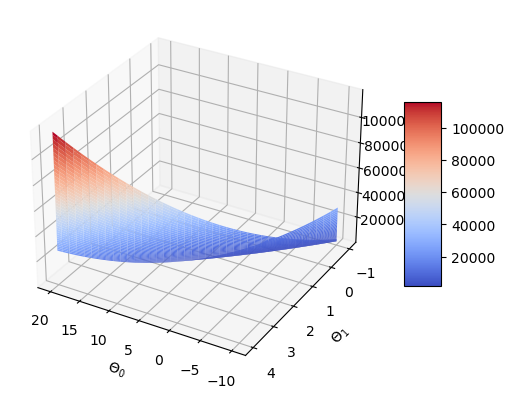

In [396]:
#3d diagram for genrating new theta values and corresponding cost values
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,20,120)
theta1_vals=np.linspace(-1,4,120)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

# Cost function observation w.r.t number of iteration

Text(0.5, 1.0, 'cost func using  GD ')

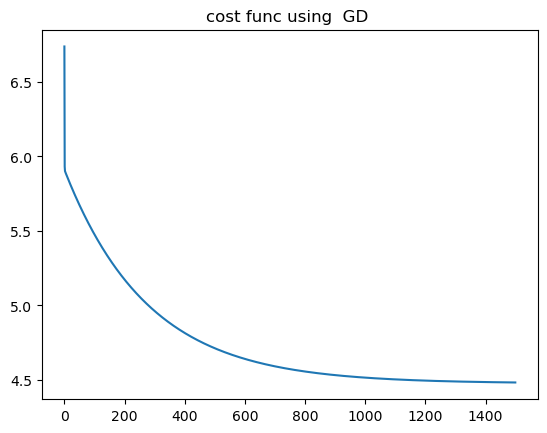

In [397]:
plt.plot(J_history)
plt.title("cost func using  GD ")

Plotting the cost function against the number of iterations gave a nice descending trend, indicating that the gradient descent implementation works in reducing the cost function

# Plot showing the best fit line

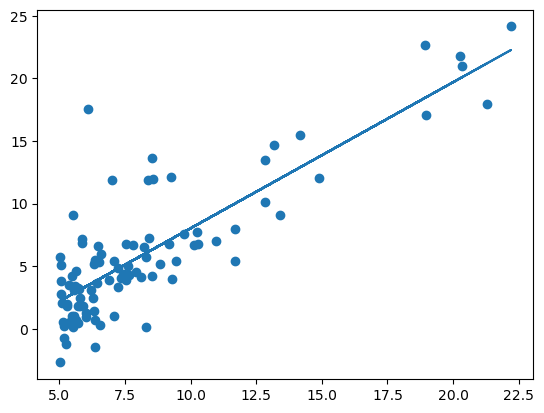

In [398]:
# plot to show the best fit line
plt.scatter(X[:,1],y)
plt.xlabel=("populaions of the city in 10000s")
plt.ylabel=("profit in $10000s")
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

# make prediction


In [399]:
#prediction funciton
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = {} we predict profit = ${}".format(3500,int(predict1)))

For population = 3500 we predict profit = $4519


# linear regression with multiple variable

Problem context:

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.

The file ex1data2.txt((available under week 2’s assignment material)) contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

You already have the necessary infrastructure which we built in our previous section that can be easily applied to this section as well. Here we will just use the equations which we made in the above section.


In [400]:
import numpy as np
import pandas as pd
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Ploting the data values


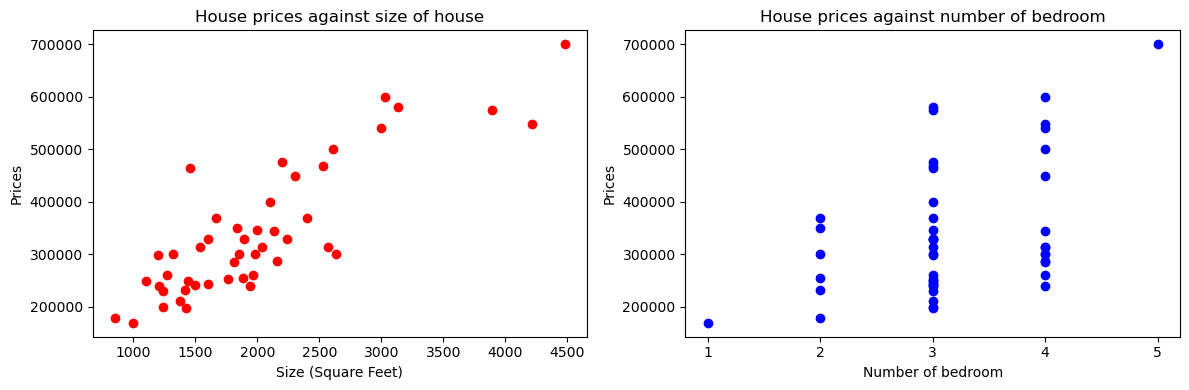

In [401]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data[0],data[2],color="red")
axes[1].scatter(data[1],data[2],color="blue")

axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")

axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

In [402]:
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples

In [403]:
X.head()

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


# Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to:

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [404]:
#feature normalisation function
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [405]:
X=featureNorm(X)

C:\Users\klikh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# adding the intercept term


In [406]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.1
iterations = 200
theta = np.zeros((3,1))
y = y[:,np.newaxis]

C:\Users\klikh\AppData\Local\Temp\ipykernel_13404\3461389228.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [407]:
#computing cost
def computeCostMultiVariate(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)
J=computeCostMultiVariate(X,y,theta)
print(" Cost = ",J)

 Cost =  65591548106.45744


# Optimal parameter by gradient descent algorithm

In [408]:
def gradientDescentMulti(X,y,theta,alpha,iterations):
    m=len(y)
    Jh_multi_linear=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=(y_pred-y)
        descent=np.dot(X.transpose(),error)
        theta-=(1/m) *alpha *descent
        Jh_multi_linear.append(computeCostMultiVariate(X,y,theta))
        
    return theta,Jh_multi_linear

theta, Jh_multi_linear=gradientDescentMulti(X,y,theta,alpha,iterations)

In [409]:
print(theta)
print("optimum cost valu is : ",Jh_multi_linear[-1])  #prints the last cost value
print("The optimum hypothesis is : h(x) =" + str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2)) + "x1"+str(round(theta[2,0],2))+"x2")

[[340412.6593343 ]
 [109440.63822766]
 [ -6571.19661218]]
optimum cost valu is :  2043280073.1502974
The optimum hypothesis is : h(x) =340412.66 + 109440.64x1-6571.2x2


these are the optimum theta values


In [410]:
#lets see the final cost over iterations
J=computeCostMultiVariate(X,y,theta)
print(J)

2043280073.1502974


## ploting the cost function w.r.t #iterations

Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

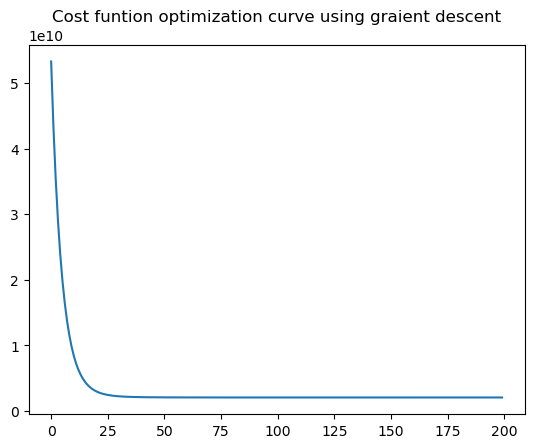

In [411]:
#plot the cost function vs iterations grap
plt.plot(Jh_multi_linear)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

In [412]:
#make predictions
def predict_house_price(feature,theta):
    y_pred=np.dot(theta.transpose(),feature)
    return y_pred
#feature normalisation of x values
x_sample = featureNorm(np.array([1650,3]))
x_sample=np.append(np.ones(1),x_sample)
predicted_price=predict_house_price(x_sample,theta)
print("Cost for new house having size 1650 and 3 bedrooms: ",predicted_price[0])
#print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

Cost for new house having size 1650 and 3 bedrooms:  456424.49417414423


# Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

### Problem context

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [413]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("ex2data1.txt",header=None)

In [414]:
data=pd.read_csv("ex2data1.txt",header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [415]:
X=data.iloc[:,:2]
y=data.iloc[:,2]
X.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


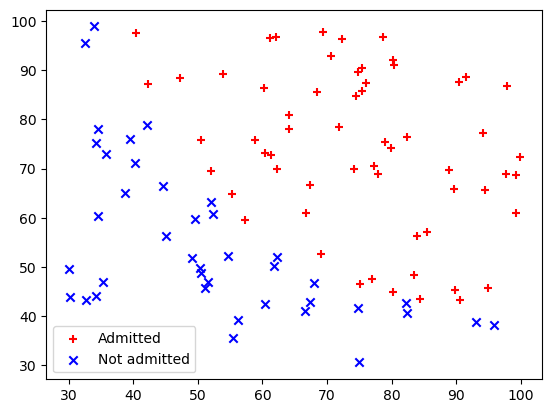

In [416]:
res=y==1
adm=plt.scatter(X[res][0].values,X[res][1].values,c="r",marker="+")
not_adm = plt.scatter(X[~res][0].values, X[~res][1].values,c="b",marker="x")
#plt.xlabel("Exam 1 score")
#plt.ylabel("Exam 2 score")
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))

# Sigmoid function
The hypothesis function that we have used in linear regression can't be used in logistic regression. Because that function may return values that are greater than one.In other words continuous values while we need catagorical result in logistic regression. Moreover, that function is not convex function. Thats why we take help from sigmoid function. Before move to further, lets implement the sigmoid function first

In [417]:
def sigmoid(x):
      return 1/(1+np.exp(-x))


# Cost Function

In [418]:
def cf_logistic(X,y,theta):
    m=len(y)
    z=np.dot(X,theta)
    y_pred=sigmoid(z)
    error=(-y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
    cost=(1/m)*np.sum(error)
    grad=(1/m)*np.dot(X.transpose(),(y_pred-y))
    return cost,grad

### Setting initial parameter and test cost function


In [419]:
m,n=X.shape[0],X.shape[1]
X=np.append(np.ones((m,1)),X,axis=1)
y=y.values.reshape(m,1)
initial_theta=np.zeros((n+1,1))
cost,grad=cf_logistic(X,y,initial_theta)
print("cost for initial theta is : ", cost)
print("grad at initial theta is : ",grad)
print("initial theta is : ",initial_theta)

cost for initial theta is :  0.6931471805599453
grad at initial theta is :  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
initial theta is :  [[0.]
 [0.]
 [0.]]


In [420]:
print("Unnormalized form of X : ", X[:5,])

Unnormalized form of X :  [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


#### Before doing gradient descent algorithm we need to perform feature normalization

In [421]:
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [422]:
X=featureNorm(X)

In [423]:
#after normalization lets have a look on the data
print("Normalized X : ",X[:5,])

Normalized X :  [[-1.26237152 -0.28185018  0.98379548]
 [-1.26237152 -0.40832276 -0.01148269]
 [-1.26237152 -0.24616364  0.83441509]
 [-1.26237152  0.46349063  1.22536647]
 [-1.26237152  1.01319169  0.90563304]]


In [424]:
num_iter=1000
alpha=.5

As mentioned in the lecture, the gradient descent algorithm is very similar to linear regression. The only difference is that the hypothesis h(x) is now g(Θ^Tx) where g is the sigmoid function.

In [425]:
def gD_logistic(X,y,theta,alpha,num_iter):
    m=len(y)
    Jh_logistic=[]
    for i in range(num_iter):
        cost,grad=cf_logistic(X,y,theta)
        theta=theta-(alpha*grad)
        Jh_logistic.append(cost)
    return theta, Jh_logistic
    

In [426]:
optimized_theta,Jh_logistic=gD_logistic(X,y,initial_theta,alpha,num_iter)
print(optimized_theta)

[[4.48213443]
 [5.69132904]
 [5.50895331]]


In [427]:
print(Jh_logistic[-1])

0.20806000435638866


Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

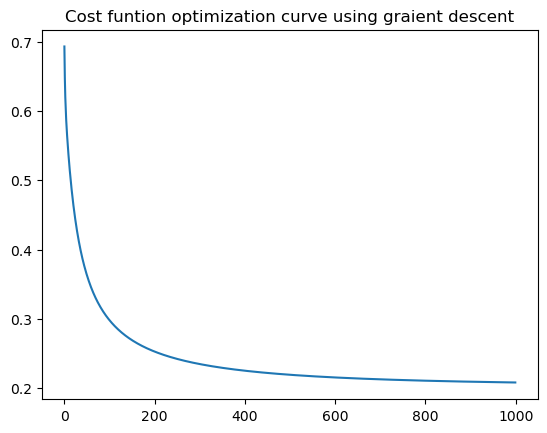

In [428]:
#plot the cost function vs iterations grap
plt.plot(Jh_logistic)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

 I tried different number of iterations and learning rate for this task. but so far this is the least when alpha=.5 and iterations =1000. and in the above curve we can see that error is plateau at 1000 iterations

# Ploting the decision boundary using optimized theta

In [429]:
print(optimized_theta)

[[4.48213443]
 [5.69132904]
 [5.50895331]]


In [430]:
print(optimized_theta.shape)

(3, 1)


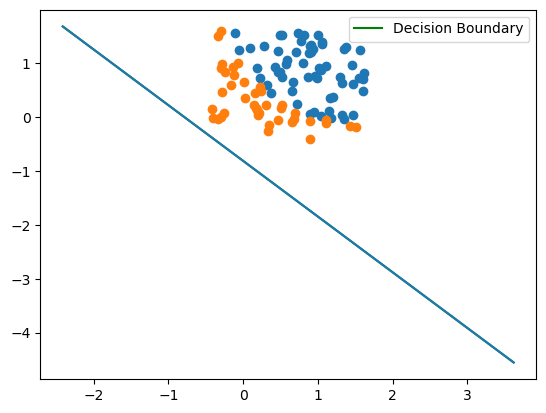

In [431]:

# Plot the decision boundary
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_y = (-1 / optimized_theta[2]) * (optimized_theta[1] * plot_x + optimized_theta[0])
plt.plot(plot_x, plot_y, c="g", label="Decision Boundary")


mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
# Set labels and legend
plt.legend()



# Accuracy 
lets check how our model is to predict

In [432]:
def lr_accuracy(X,y,theta,cutoff):
    pred=[sigmoid(np.dot(X,theta))>=cutoff]
    ac=np.mean(pred==y)
    print(ac*100,"%")
lr_accuracy(X,y,optimized_theta,.5)

89.0 %


89 percent is not that model. However we should do further work to increase 

# Predictions
lets predict for an unknown value

In [436]:
x_test = np.array([60,70])
x_test = np.append(np.ones(1),x_test)
x_test = featureNorm(x_test)
prob = sigmoid(x_test.dot(optimized_theta))
print("Student with scores 45 and 85, we predict an admission probability of",prob[0])

Student with scores 45 and 85, we predict an admission probability of 0.8230090915004592
